In [1]:
import numpy as np
import math
import torch
from torch.autograd import Variable
from torch import nn, optim

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns

from IPython import display

In [2]:
def optimization(x0,optim_method,lr=0.01,eps=0.01,plot_loss=False):
    x = Variable(torch.FloatTensor([x0]), requires_grad=True)

    if optim_method=='SGD':
        optimizer = optim.SGD([x],lr=lr)     
    
    loss_history = []
    
    while True:
        optimizer.zero_grad()
        loss = (x + 2 * torch.sin(x))**2
        
        loss_history.append(loss.item())
        loss.backward(retain_graph=True)
        optimizer.step()
        
        if plot_loss:
            # Visualize
            display.clear_output(wait=True)
            plt.figure(figsize=(8, 6))

            plt.title(optim_method + " Loss Curve")
            plt.xlabel("Iterations")
            plt.ylabel("loss")
            plt.plot(loss_history, 'b')
            plt.show()
        
        if len(loss_history)>1 and abs(loss_history[-1] - loss_history[-2])<eps:
            print('Minimum found:',x.item())
            break

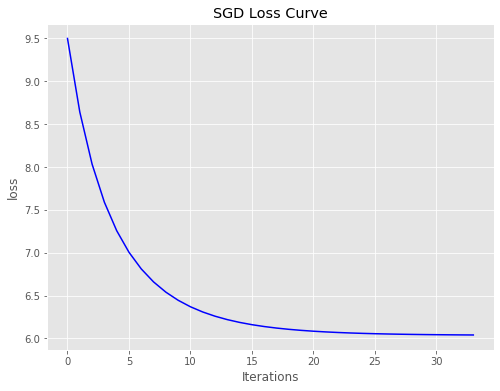

Minimum found: 4.218443393707275


In [3]:
optimization(x0=5,optim_method='SGD',lr=0.01,eps=0.001,plot_loss=True)

In [ ]:
def f(x):
    return (x + 2 * math.sin(x))**2

In [ ]:
x = np.linspace(-100,100,100*100)
y = np.array([f(i) for i in x])

In [ ]:
plt.figure(figsize=(15,5))

plt.plot(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')

plt.title(r'$f(x) = (x + 2 \cdot \sin(x))^{2}$')
plt.show()